In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [2]:
#Load dataset
df=pd.read_csv('Titanic_Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Display the Dimentionality
df.shape

(418, 12)

In [5]:
#Display indexes
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Display info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Display statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#Display the sum of null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Check for duplicates
dupe=df.duplicated().sum()
dupe

0

In [10]:
#Data Cleaning
#Checking null value percentage in cabin column
df['Cabin'].isnull().sum()/len(df)*100

#This column has 327 missing values, making up 78% of the data. Therefore, it is necessary to drop this column. 

78.22966507177034

In [11]:
#Drop Cabin column
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [13]:
#Check null in fare column
df['Fare'].isnull().sum()

1

In [14]:
#Fill missing 'Fare' with common value
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [15]:
#Again checking null
df['Fare'].isnull().sum()

0

In [16]:
#Checking null for Age column
df['Age'].isnull().sum()

86

In [17]:
#Fill missing 'Age' with median value
df['Age']=df['Age'].fillna(df['Age'].mean())

In [18]:
#Again checking for null
df['Age'].isnull().sum()

0

In [19]:
#Feature Engineering
df['FamilySize']=df['SibSp']+df['Parch']+1 
#Sibsp=Siblings/Spouses , Parch=Parents/Children and +1 for passenger themselves
df['FamilySize'].head()

0    1
1    2
2    1
3    1
4    3
Name: FamilySize, dtype: int64

In [20]:
#Extract titles from name 
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
df['Title'].head(50)

0         Mr
1        Mrs
2         Mr
3         Mr
4        Mrs
5         Mr
6       Miss
7         Mr
8        Mrs
9         Mr
10        Mr
11        Mr
12       Mrs
13        Mr
14       Mrs
15       Mrs
16        Mr
17        Mr
18      Miss
19       Mrs
20        Mr
21    Master
22       Mrs
23        Mr
24       Mrs
25        Mr
26      Miss
27        Mr
28        Mr
29        Mr
30        Mr
31        Mr
32       Mrs
33       Mrs
34        Mr
35        Mr
36      Miss
37      Miss
38        Mr
39        Mr
40        Mr
41        Mr
42        Mr
43       Mrs
44       Mrs
45        Mr
46        Mr
47        Mr
48       Mrs
49       Mrs
Name: Title, dtype: object

In [21]:
#Define Mapping for titles
title_mapping={
    'Mr':'Mr',
    'Mrs':'Mrs',
    'Miss':'Miss',
    'Ms':'Mrs',#treat as same for simplicity
    'Master':'Master',
    'Dr':'Rare',
    'Rev':'Rare',
    'Col':'Rare',
    'Dona':'Rare',  
}

df['Title']=df['Title'].map(title_mapping)

In [22]:
#Create new feature: Is passenger travelling alone or with fmaily
df['IsAlone']=1 #Assumption
df.loc[df['FamilySize']>1,'IsAlone']=0

In [23]:
#Create Age Groups Feature
bins=[0,12,18,30,50,100]
labels=['Child','Teenager','Young Adult','Adult','Senior']

df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)

In [24]:
#Verify AgeGroup Column
df[['Age','AgeGroup']].head(20)

,Age,AgeGroup
0,34.50000,Adult
1,47.00000,Adult
2,62.00000,Senior
3,27.00000,Young Adult
4,22.00000,Young Adult
5,14.00000,Teenager
6,30.00000,Adult
7,26.00000,Young Adult
8,18.00000,Young Adult
9,21.00000,Young Adult


In [25]:
df['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

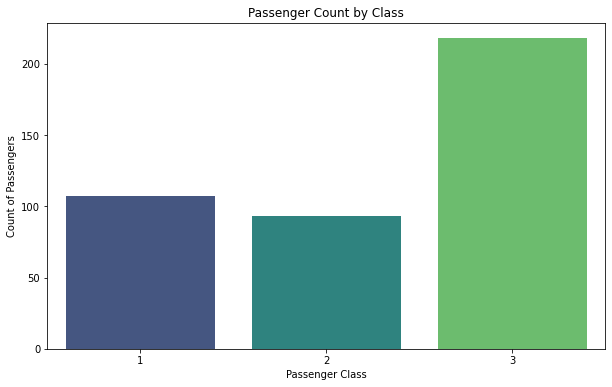

In [26]:
#Data Visualization
#Passenger Count by Class
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',data=df,palette='viridis')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

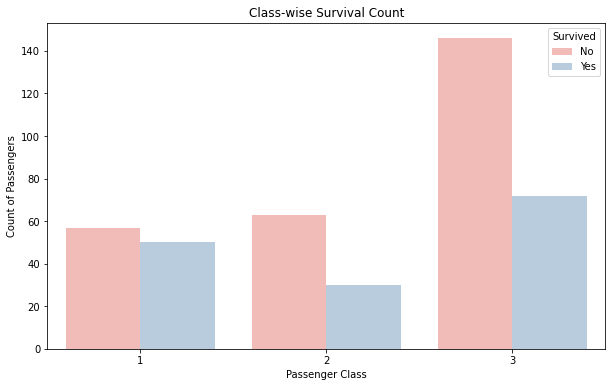

In [27]:
#Class-wise survival count
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',hue='Survived',data=df,palette='Pastel1')
plt.title('Class-wise Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.legend(title='Survived',loc='upper right', labels=['No','Yes'])
plt.show()

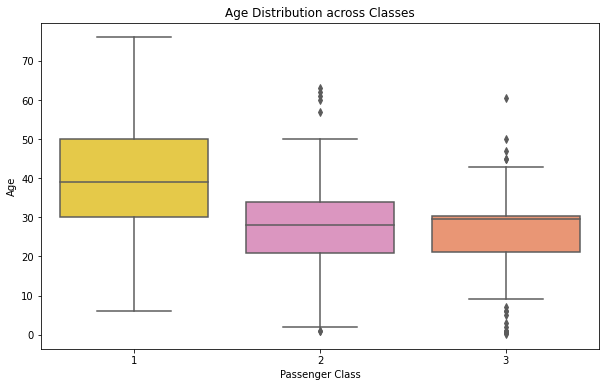

In [28]:
#Age Distribution across Classes
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='Set2_r')
plt.title('Age Distribution across Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

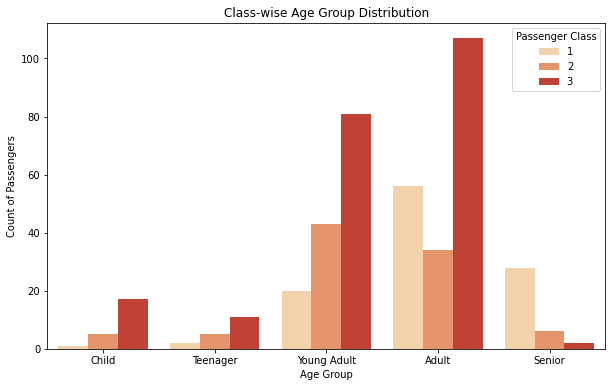

In [29]:
#Class-wise Age Group Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='AgeGroup',hue='Pclass',data=df,palette='OrRd')
plt.title('Class-wise Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count of Passengers')
plt.legend(title='Passenger Class',loc='upper right')
plt.show()

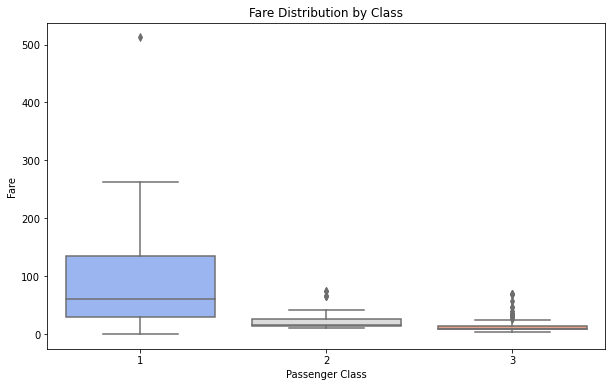

In [30]:
#Fare Distribution by Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=df,palette='coolwarm')
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


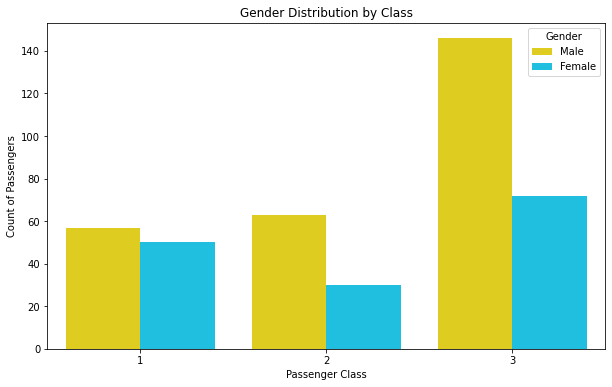

In [53]:
#Gender Distribution by Class
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',hue='Sex',data=df,palette='jet_r')
plt.title('Gender Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.legend(title='Gender',loc='upper right',labels=['Male','Female'])
plt.show()

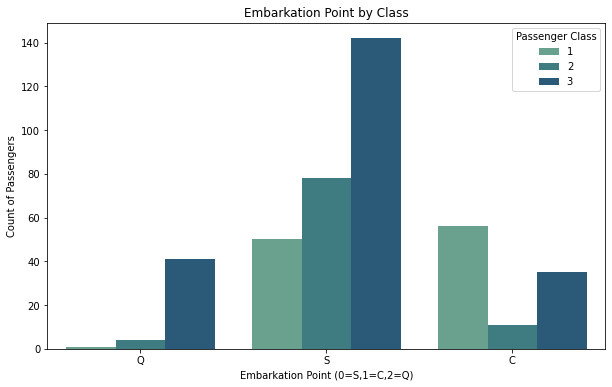

In [56]:
#Embarkation Point by Class
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked',hue='Pclass',data=df,palette='crest')
plt.title('Embarkation Point by Class')
plt.xlabel('Embarkation Point (0=S,1=C,2=Q)')
plt.ylabel('Count of Passengers')
plt.legend(title='Passenger Class',loc='upper right')
plt.show()

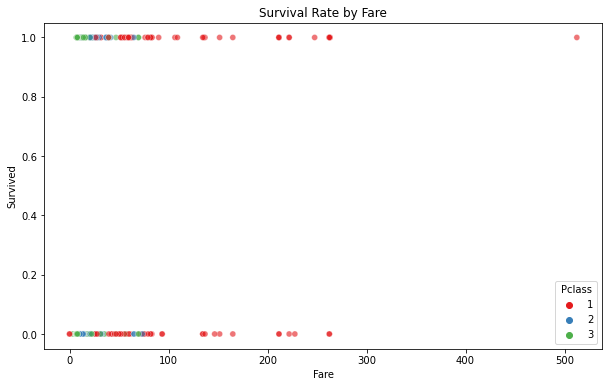

In [93]:
#Survival Rate by Fare
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Fare',y='Survived',hue='Pclass',palette='Set1',alpha=0.6)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

In [107]:
#Age Group Distribution
fig=px.histogram(df,x='AgeGroup',color='AgeGroup',
                category_orders={'AgeGroup':['Child','Teenager','Young Adult','Adult','Senior']},
                title='Age Group Distribution',
                labels={'AgeGroup':'Age Group'},
                color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title='Age Group',yaxis_title='Count of Passengers')
fig.show()

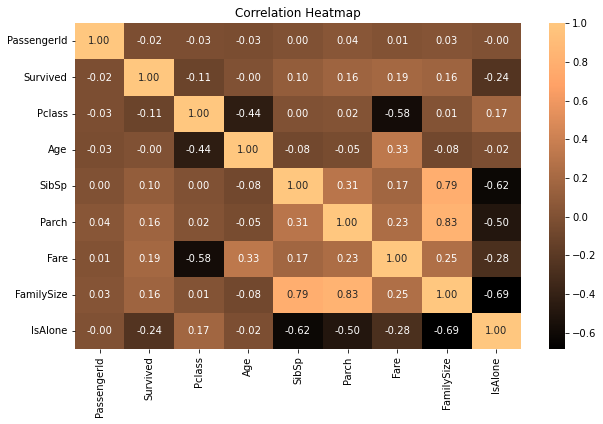

In [127]:
#Feature Correlation Heatmap
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='copper',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

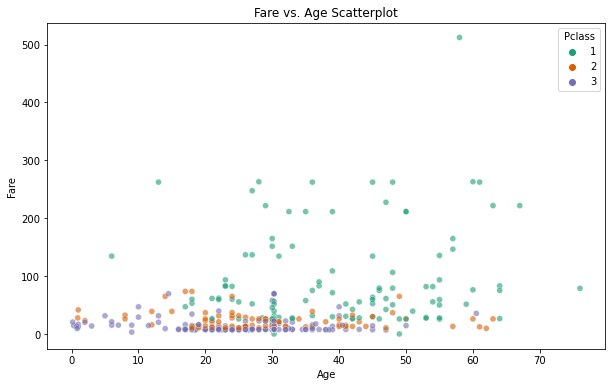

In [161]:
#Fare vs. Age Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',data=df,hue='Pclass',palette='Dark2',alpha=0.6)
plt.title('Fare vs. Age Scatterplot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Pclass',loc='upper right')
plt.show()

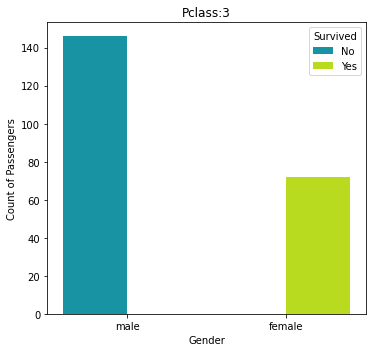

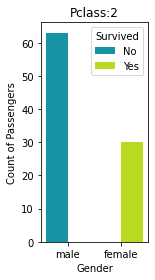

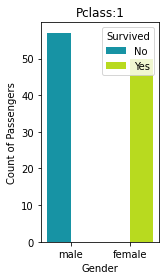

In [167]:
#Survival Rate by Gender and Class
plt.figure(figsize=(15,5))

#Create count plot for each passenger class
for pclass in df['Pclass'].unique():
    plt.subplot(1,3,pclass)
    sns.countplot(x='Sex',hue='Survived',data=df[df['Pclass']==pclass],palette='nipy_spectral')
    plt.title(f'Pclass:{pclass}')
    plt.xlabel('Gender')
    plt.ylabel('Count of Passengers')
    plt.legend(title='Survived',loc='upper right',labels=['No','Yes'])
    plt.tight_layout()
    plt.show()

In [171]:
#Passenger Survival Sunburst Chart
fig=px.sunburst(df,path=['Pclass','Sex','Survived','Embarked'],
               title='Sunburst chart of Passengers by Class,Gender,Survival and Embarkation',
               color='Survived',
               color_continuous_scale='RdBu',
               labels={'Survived':'Survived Status (No=0,Yes=1)','Pclass':'Passenger Class','Sex':'Gender','Embarked':'Embarkation point'},
               color_discrete_map={0:'red',1:'yellow'})
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25))
fig.show()